In [606]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import tree
import datetime
import re


from bs4 import BeautifulSoup

import requests

from urllib.request import urlopen


In [1]:
!pwd

/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project


In [2]:
%history -g

 2/1: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 2/2: hello()
 2/3: dir()
 2/4: help(hello)
 2/5: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 2/6: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 2/7: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 2/8: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 2/9: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
2/10: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
2/11: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
2/12: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
2/13: Hello()
2/14: %reset
2/15: %reset
2/16: dir()
2/17: reset%
2/18: %reset
2/19: %reset -f
 4/1: runfile('/Users/alecnigh/hello.py', wdir='/Users/alecnigh')
 4/2: dir()
 4/3: %reset
 4/4: dir()
16/1: runfile('/Users/alecnigh/Rock paper Scissors', wdir='/Users/alecnigh')
16/2: runfile('/Users/alecnigh/Rock paper Scissors', wdir='/Users/alecnigh')
16/3: runfi

In [5]:
%history -g -f Pre-processing

File 'Pre-processing' exists. Overwrite? yes
Overwriting file.


In [509]:
df = pd.read_csv('Master_NFL_df.csv')
df.head()

,Unnamed: 0,Tm_Away,W_Away,L_Away,W-L%_Away,PF_Away,PA_Away,PD_Away,MoV_Away,SoS_Away,...,Run_Yds/G_Home,Yds/G_Defense_Home,Yds/G_Pass_D_Home,Yds/G_Run_D_Home,Yds/G_Offense_Away,Pass_Yds/G_Away,Run_Yds/G_Away,Yds/G_Defense_Away,Yds/G_Pass_D_Away,Yds/G_Run_D_Away
0,0,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,108.6250,331.6250,201.3750,130.2500,335.5625,212.5,123.0625,294.375,200.1875,94.1875
1,1,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,97.0000,329.5625,188.6875,140.8750,335.5625,212.5,123.0625,294.375,200.1875,94.1875
2,2,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,104.5625,289.0625,187.9375,101.1250,335.5625,212.5,123.0625,294.375,200.1875,94.1875
3,3,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,101.8125,355.0625,238.6250,116.4375,335.5625,212.5,123.0625,294.375,200.1875,94.1875
4,4,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,110.1250,332.2500,159.2500,173.0000,335.5625,212.5,123.0625,294.375,200.1875,94.1875


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Columns: 186 entries, Unnamed: 0 to Yds/G_Run_D_Away
dtypes: float64(113), int64(62), object(11)
memory usage: 5.7+ MB


# Creating Dummy Variables

In [510]:
#Checking to see if all the data was actually dropped

filteredColumns = df.dtypes[df.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Tm_Away', 'Tm_Home', 'Date', 'Home Team', 'Away Team', 'Winner', 'Week', 'Day', 'Time', 'Winner/tie', 'Loser/tie']


<ipython-input-510-29dcc7e13d40>:3: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [511]:
#Editiing Week so it can still be included

df.loc[df['Week'] == 'WildCard', ['Week']] = 18
df.loc[df['Week'] == 'Division', ['Week']] = 19
df.loc[df['Week'] == 'ConfChamp', ['Week']] = 20
df.loc[df['Week'] == 'SuperBowl', ['Week']] = 21

df['Week'] = df['Week'].astype(int)

In [512]:
df['Away Winner'] = (df['Away Score'] > df['Home Score']) == 1

df['Away Winner'] = df["Away Winner"].astype(int)

In [513]:
df.drop(['Tm_Away', 'Tm_Home', 'Winner', 'Winner/tie', 'Loser/tie', 'Time'], axis = 1, inplace=True)

In [528]:
#Checking to see if all the data was actually dropped

filteredColumns = df.dtypes[df.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Home Team', 'Away Team']


<ipython-input-528-29dcc7e13d40>:3: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [515]:

#Time to make Date a datetime object

df['Date'] = pd.to_datetime(df['Date'])

In [516]:
df.drop('Day', axis = 1, inplace=True)

In [533]:
df = pd.get_dummies(df)


In [534]:
df.columns.values.tolist()

['Unnamed: 0',
 'W_Away',
 'L_Away',
 'W-L%_Away',
 'PF_Away',
 'PA_Away',
 'PD_Away',
 'MoV_Away',
 'SoS_Away',
 'SRS_Away',
 'OSRS_Away',
 'DSRS_Away',
 'Year',
 'Yds_Away',
 'Ply_Away',
 'Y/Ply_Away',
 'TO_Away',
 'FL_Away',
 '1stD_Away',
 'Cmp_Away',
 'Pass_Att_Away',
 'Pass_Yds_Away',
 'P_TD_Away',
 'Int_Away',
 'Pass/A_Away',
 'P_1stD_Away',
 'Run_Att_Away',
 'Run_Yds_Away',
 'R_TD_Away',
 'Y/A_Away',
 'R_1stD_Away',
 'Pen_Away',
 'Pen_Yds_Away',
 'Pen_1st_Away',
 'Sc%_Away',
 'TO%_Away',
 'EXP_Away',
 'G_D_Away',
 'PF_D_Away',
 'Ply_D_Away',
 'Y/P_D_Away',
 'TO_D_Away',
 'FL_D_Away',
 'Cmp_D_Away',
 'Int_D_Away',
 'NY/A_D_Away',
 'Y/A_D_Away',
 'Pen_D_Away',
 '1stPy_D_Away',
 'Sc%_D_Away',
 'TO%_D_Away',
 'EXP_D_Away',
 'Total_Yds_D_Away',
 'Pass_1st_D_Away',
 'Pass_Att_D_Away',
 'Pass_Yds_D_Away',
 'Pass_TDs_D_Away',
 'Rush_1st_D_Away',
 'Rush_Att_D_Away',
 'Rush_Yds_D_Away',
 'Rush_TDs_D_Away',
 'Pen_1st_D_Away',
 'Pen_Yds_D_Away',
 'W_Home',
 'L_Home',
 'W-L%_Home',
 'PF_Home

In [530]:
original_names = df.select_dtypes(include=['object'])


In [507]:
# Making Dummy Varibales out of our Home and Away Teams

dfo=df.select_dtypes(include=['object']) # select object type columns

pd.get_dummies(df)
#df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [536]:
#checking to make sure that our data works

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Columns: 250 entries, Unnamed: 0 to Away Team_Washington Redskins
dtypes: datetime64[ns](1), float64(113), int64(64), uint8(72)
memory usage: 5.7 MB


# Now to Break into Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

In [584]:
new = df[['Home Line Open', 'P_1stD%_Home', 'R_1stD%_Home','Pass_1st_D_Away',\
          'Pass_1st_D_Home', 'Pass/A_Away', 'Run_Att_Away', 'Yds/G_Run_D_Away', 'Yds/G_Run_D_Home', 'Away Cover'\
         , 'Pass_Yds/G_Away',  'Run_Yds/G_Away',  'Pass_Yds/G_Home', 'Run_Yds/G_Home', 'TO%_D_Away', 'TO%_D_Home'\
         ,'TO%_Away', 'TO%_Home']]

In [585]:
# Separating our target variable (covering the spread) from other features

X = new.drop(columns='Away Cover', axis = 1)
Y = new['Away Cover']


In [586]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Home Line Open    3989 non-null   float64
 1   P_1stD%_Home      3989 non-null   float64
 2   R_1stD%_Home      3989 non-null   float64
 3   Pass_1st_D_Away   3989 non-null   int64  
 4   Pass_1st_D_Home   3989 non-null   int64  
 5   Pass/A_Away       3989 non-null   float64
 6   Run_Att_Away      3989 non-null   float64
 7   Yds/G_Run_D_Away  3989 non-null   float64
 8   Yds/G_Run_D_Home  3989 non-null   float64
 9   Pass_Yds/G_Away   3989 non-null   float64
 10  Run_Yds/G_Away    3989 non-null   float64
 11  Pass_Yds/G_Home   3989 non-null   float64
 12  Run_Yds/G_Home    3989 non-null   float64
 13  TO%_D_Away        3989 non-null   float64
 14  TO%_D_Home        3989 non-null   float64
 15  TO%_Away          3989 non-null   float64
 16  TO%_Home          3989 non-null   float64


In [587]:
# Class for breaking apart our seasons that the data is tested and trained within the same season.

class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            print(start, mid, stop, margin)
            yield indices[start: mid], indices[mid + margin: stop]

In [588]:
#Splitting into 15 as thats each season where a team will be (somewhat) similar

btscv = BlockingTimeSeriesSplit(n_splits=15)

In [589]:
for train_index, test_index in btscv.split(X): 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, test_size=0.3, 
                                                    random_state=47)

0 132 265 0
265 397 530 0
530 662 795 0
795 927 1060 0
1060 1192 1325 0
1325 1457 1590 0
1590 1722 1855 0
1855 1987 2120 0
2120 2252 2385 0
2385 2517 2650 0
2650 2782 2915 0
2915 3047 3180 0
3180 3312 3445 0
3445 3577 3710 0
3710 3842 3975 0


In [590]:
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
(list(zip(X.columns, cat_mod.feature_importances_)))

[('Home Line Open', 0.09824559971801138),
 ('P_1stD%_Home', 0.046599899518126126),
 ('R_1stD%_Home', 0.044505294508897106),
 ('Pass_1st_D_Away', 0.04228570959791771),
 ('Pass_1st_D_Home', 0.047909206488466395),
 ('Pass/A_Away', 0.03771924246389985),
 ('Run_Att_Away', 0.04227289202618364),
 ('Yds/G_Run_D_Away', 0.08566343067986179),
 ('Yds/G_Run_D_Home', 0.07118245893802194),
 ('Pass_Yds/G_Away', 0.06818168390988943),
 ('Run_Yds/G_Away', 0.06637709542875829),
 ('Pass_Yds/G_Home', 0.04882623900883503),
 ('Run_Yds/G_Home', 0.05796517557688342),
 ('TO%_D_Away', 0.049434285250635694),
 ('TO%_D_Home', 0.061811760634019663),
 ('TO%_Away', 0.06676551615369232),
 ('TO%_Home', 0.06425451009790022)]

In [558]:
X = new[['Home Line Open', 'P_1stD%_Home', 'R_1stD%_Home','Pass_1st_D_Away',\
          'Pass_1st_D_Home', 'Pass/A_Away', 'Run_Att_Away', 'Yds/G_Run_D_Away', 'Yds/G_Run_D_Home',\
        'TO%_D_Away', 'TO%_D_Home', 'Pass_Yds/G_Away',  'Run_Yds/G_Away',  'Pass_Yds/G_Home', 'Run_Yds/G_Home'\
        ,'TO%_Away', 'TO%_Home']]
Y = new['Away Cover']

#tscv = TimeSeriesSplit(n_splits=18, test_size=64)
for train_index, test_index in btscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
    #print("TRAIN:", X_train, "TEST:", X_test)
    
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
list(zip(new.columns, cat_mod.feature_importances_))


0 132 265 0
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131] TEST: [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239


AttributeError: 'list' object has no attribute 'value_counts'

In [591]:
#Predict using the model:

dec_tree = cat_mod.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, dec_tree)
print(cnf_matrix)
Accuracy_rf= cat_mod.score(X_test,y_test)
print(Accuracy_rf)

[[278 298]
 [303 318]]
0.4979114452798663


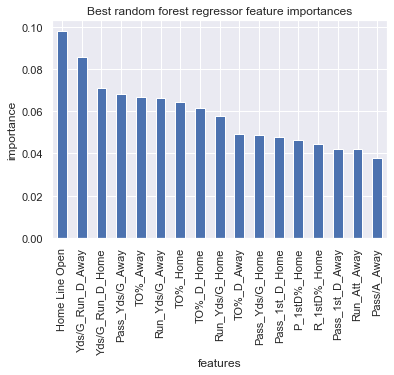

In [592]:
features = cat_mod.feature_importances_
rf_feat_imps = pd.Series(features, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Wow! Looks like our predicted line is pretty important when deciding who will cover. We got rid of that and it looks like the most important feauture when deciding who wins is actually the Home line Open! So based on this, the underlying statstics behind the "Cover" is weighted less than the line vegas produces. Could this imply an edge, where one can ignore some stats and look at the number itself? Furthermore, we see the Yards per game run defense is a contributing factor. If a team is able to stop the run, it makes an offense one dimiensional. Could this be another tell-tale sign of which team has a better chance of covering?

In [437]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [593]:


# model = build_model(_alpha=1.0, _l1_ratio=0.3)

#btscv = BlockingTimeSeriesSplit(n_splits=3)
scores = cross_val_score(cat_mod, X_train, y_train, cv=btscv, scoring='accuracy')
print(scores)

0 93 186 0
186 279 372 0
372 465 558 0
558 651 744 0
744 837 930 0
930 1023 1116 0
1116 1209 1302 0
1302 1395 1488 0
1488 1581 1674 0
1674 1767 1860 0
1860 1953 2046 0
2046 2139 2232 0
2232 2325 2418 0
2418 2511 2604 0
2604 2697 2790 0
[0.60215054 0.49462366 0.48387097 0.49462366 0.53763441 0.48387097
 0.51612903 0.48387097 0.44086022 0.56989247 0.60215054 0.49462366
 0.56989247 0.46236559 0.50537634]


In [594]:
print(np.mean(scores))

0.5161290322580645


Here, we are seeing that the Away Winner is able to predict who covers less than half the time. Inversely, 58% of the time, the losing team may lose, but will still cover. This is importantly when people bet as they may focus on the winning more than the pointspread when deciding to bet. 

In [595]:
confusion_matrix(y_test, cat_mod.predict(X_test))

array([[278, 298],
       [303, 318]])

# Choosing the right model

This is a classification problem, in supervised learning. Here we have used the following classification models:

• Logistic Regression

• K-Nearest Neighbor (KNN)

• Support vector machine (SVM)

• Random Forest

• Naive Bayes

• Gradient Boost

# Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic Regression uses the features to approxmiate a plot for our target variable. Using this plane and judging how other factors influence the final decision (in this case whether a team covers or not), we can get a sense of by picking a random spot on that plot what the outcome would be. 

Note: Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.

Note 2: Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model 5, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

C-1: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

__The choice of the distribution depends on the problem at hand:__

• If the target values  are counts (non-negative integer valued) or relative frequencies (non-negative), you might use   a Poisson deviance with log-link.

• If the target values are positive valued and skewed, you might try a Gamma deviance with log-link.

• If the target values seem to be heavier tailed than a Gamma distribution, you might try an Inverse Gaussian deviance   (or even higher variance powers of the Tweedie family).

__Examples of use cases include:__

• Agriculture / weather modeling: number of rain events per year (Poisson), amount of rainfall per event (Gamma),       total rainfall per year (Tweedie / Compound Poisson Gamma).

• Risk modeling / insurance policy pricing: number of claim events / policyholder per year (Poisson), cost per event     (Gamma), total cost per policyholder per year (Tweedie / Compound Poisson Gamma).

• Predictive maintenance: number of production interruption events per year (Poisson), duration of interruption    (Gamma), total interruption time per year (Tweedie / Compound Poisson Gamma).

In [596]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecn

,C_parameter,Accuracy
0,0.001,0.609023
1,0.010,0.611529
2,0.100,0.610693
3,1.000,0.611529
4,10.000,0.610693
5,100.000,0.612364


Looks like our C_Parameter being 0.100 is our ticket!

In [614]:

from sklearn.metrics import confusion_matrix

y_pred_lr = Logreg.predict(X_test)
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[305 271]
 [193 428]]
0.6123642439431913


In [598]:
from sklearn.model_selection import cross_val_score


cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecn

[0.71109565 0.61081758 0.62706872 0.68758766 0.64095372]
Mean cross validation test score: 0.6555046650868115
Mean cross validation train score: 0.6363590079772701
Standard deviation in cv test scores: 0.0377808023746072


/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alecn

# AbaBoost

Adaboost - Uses a weak simulation where the result is merely a little better than picking the games at random and then assesses what features caused those results. Based on the features impact, a weight is assessed to the next iteration, and each subsequent iterations after that. The more prominent the feature that caused the weak predicition, the lower the weight that feature will get, while those that had least influence on the negative decison has a higher assigned weight.  The model continues to simulate until there is no weights to adjust.

In [608]:
from sklearn import tree

In [612]:
bdt_real = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

In [613]:
scores = cross_val_score(bdt_real, X_train, y_train, scoring = 'accuracy', cv=5)
scores.mean()

0.5336789325536513

In [ ]:
scores = cross_val_score(bdt_real, X_train, y_train, scoring = 'accuracy', cv=5)
scores.mean()

In [616]:
#The following example shows how to fit an AdaBoost classifier with 100 weak learners:

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=75, learning_rate = 1)
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X, Y, scoring = 'accuracy', cv=5)
scores.mean()

0.5823520532825163

In [617]:
from sklearn.metrics import confusion_matrix


y_ada_pred = clf.predict(X_test)
cnf_matrix= confusion_matrix(y_test,y_ada_pred)
print(cnf_matrix)
Accuracy_ada=clf.score(X_test,y_test)

print(Accuracy_ada)

[[301 275]
 [231 390]]
0.5772765246449457


In [618]:
from sklearn.model_selection import cross_val_score


cv_scores_test= cross_val_score(clf,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_ada_test= cv_scores_test.mean()
cv_scores_ada_train= cv_scores_train.mean()
cv_scores_std_test_ada= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_ada_test))
print ('Mean cross validation train score: ' +str(cv_scores_ada_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_ada))

[0.56666667 0.58333333 0.54811715 0.59832636 0.51882845]
Mean cross validation test score: 0.5630543933054393
Mean cross validation train score: 0.5737767775277153
Standard deviation in cv test scores: 0.02773968470880642


In [601]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit

# Random Forrest

A Random Forest is an estimator that takes a bunch of decision trees and uses the averages to make predicitions and control over-fitting.  The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias.

Consider using dimension reduciton like PCA or Feauture Selection beforehand to give your tree a better chance of finding features that are discriminative.

In [414]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [619]:
rf_2 = RandomForestClassifier()
rf_2.fit(X_train, y_train)

RandomForestClassifier()

In [620]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'n_estimators' : [100, 200, 300, 500, 750, 1000]}


lr_grid_cv = GridSearchCV(rf_2, param_grid=grid_params, cv=btscv, scoring = 'accuracy', n_jobs=-1)
lr_grid_cv.fit(X_train,y_train)

0 93 186 0
186 279 372 0
372 465 558 0
558 651 744 0
744 837 930 0
930 1023 1116 0
1116 1209 1302 0
1302 1395 1488 0
1488 1581 1674 0
1674 1767 1860 0
1860 1953 2046 0
2046 2139 2232 0
2232 2325 2418 0
2418 2511 2604 0
2604 2697 2790 0


GridSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x7fc0f72a8d00>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 500, 750, 1000]},
             scoring='accuracy')

In [622]:
print(lr_grid_cv.best_estimator_)
print(lr_grid_cv.best_params_)

RandomForestClassifier(max_depth=3, n_estimators=200)
{'max_depth': 3, 'n_estimators': 200}


In [626]:
#Running our model again with the optimaized parameters

rf = RandomForestClassifier(max_depth=3, n_estimators = 200, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [629]:
from sklearn.metrics import confusion_matrix


y_rf_pred = rf.predict(X_test)
cnf_matrix= confusion_matrix(y_test,y_rf_pred)
print(cnf_matrix)
RF_score=rf.score(X_test,y_test)

print(RF_score)

[[183 393]
 [141 480]]
0.5538847117794486


In [631]:
from sklearn.model_selection import cross_val_score


cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.54583333 0.54583333 0.56903766 0.58995816 0.57740586]
Mean cross validation test score: 0.5656136680613668
Mean cross validation train score: 0.5587287847602926
Standard deviation in cv test scores: 0.017469727873021514


In [ ]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

# Assess the Performance

In [633]:
y_tr_pred = rf.predict(X_train)
y_te_pred = rf.predict(X_test)

In [634]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(-0.5665391481764854, -0.7869867149758454)

In [635]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.39004297994269344, 0.44611528822055135)

In [636]:
rf_scores = cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv=5)
rf_scores.mean()

0.5587287847602926

In [637]:
confusion_matrix(y_test, rf.predict(X_test))

array([[183, 393],
       [141, 480]])

# Nearest neighbor

A nearest neighbor classifier does not attempt to predict anything. Rather, Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The optimal choice of the value  is highly data-dependent: in general a larger K suppresses the effects of noise, but makes the classification boundaries less distinct.

Explanantion of why KNeighborsClassifier doesn't work with uniformed data:

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. 

This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point.

In [189]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets



In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [638]:
#First let's try a bunch and see if there's anything that we can look to as an optimal amount of neighbors

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [639]:
print(list(enumerate(zip(train_scores, test_scores))))

[(0, (0.9996418338108882, 0.49707602339181284)), (1, (0.7582378223495702, 0.4979114452798663)), (2, (0.7521489971346705, 0.5213032581453634)), (3, (0.6955587392550143, 0.49958228905597324)), (4, (0.6977077363896849, 0.5054302422723476)), (5, (0.6701289398280802, 0.506265664160401)), (6, (0.6686962750716332, 0.5029239766081871)), (7, (0.6547277936962751, 0.49456975772765244)), (8, (0.6572349570200573, 0.5254803675856308))]


In [219]:
print(np.mean(test_scores))
score_std = np.std(test_scores)

0.4876543209876544


In [640]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
#knn_disp= plot_roc_curve(knn,X_test,y_test)

[[194 382]
 [195 426]]
0.5179615705931495


In [642]:


cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.54166667 0.5125     0.52719665 0.55230126 0.49372385]
Mean cross validation test score: 0.5254776847977685
Mean cross validation train score: 0.5397522457537461
Standard deviation in cv scores: 0.020790710821615585


In [257]:
print(max(test_scores))
best = max(test_scores)

0.5694444444444444


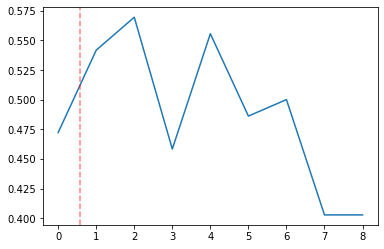

In [258]:
plt.plot(test_scores)
plt.axvline(best, c='r', ls='--', alpha=.5)
plt.show()

# Support Vector Machines

SVM's are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

• Effective in high dimensional spaces.

• Still effective in cases where number of dimensions is greater than the number of samples.

• Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

• Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

• If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

• SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

Helpful for when there's some blank areas in our data. When using SVM, be sure to normalize your data setting the mean to 0 and the std to 1.

In [644]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[315 261]
 [202 419]]
0.6131996658312447


In [648]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.6375     0.55       0.59832636 0.63598326 0.58995816]
Mean cross validation test score: 0.6023535564853556
Mean cross validation train score: 0.5916876655061201
Standard deviation in cv scores: 0.032486885848603465


# Gradient Boosting

In [649]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[269 307]
 [245 376]]
0.5388471177944862


In [650]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.53333333 0.55833333 0.55230126 0.57322176 0.55648536]
Mean cross validation test score: 0.5547350069735006
Mean cross validation train score: 0.5497803938164029
Standard deviation in cv scores: 0.012819722256577291


# Naive Bayes

In [651]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[306 270]
 [227 394]]
0.5847953216374269


In [652]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.575      0.52083333 0.57740586 0.59414226 0.53974895]
Mean cross validation test score: 0.561426080892608
Mean cross validation train score: 0.5608870166259514
Standard deviation in cv scores: 0.026935559659755262


# Comparing the models

We applied different ML models above and evaluated their performances in terms of accuracy score for both the training and test data. Here we have tabulated the scores and plotted them.

Clearly, the ____, and the ____ are the two best performing models. Both of the models are ensembled, based on decision trees.

So, we will perform a grid search/ hyperparameter tuning for those two ML models.

In [ ]:
from sklearn.model_selection import cross_val_score


cv_scores_test= cross_val_score(clf,X_test,y_test,cv=5,scoring='accuracy')
cv_scores_train= cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(cv_scores_test)
cv_scores_ada_test= cv_scores_test.mean()
cv_scores_ada_train= cv_scores_train.mean()
cv_scores_std_test_ada= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_ada_test))
print ('Mean cross validation train score: ' +str(cv_scores_ada_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_ada))

In [654]:
myLabels = [ 'Logistic Regression','AdaBoost','KNN','Random Forest','SVM','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_ada_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_ada_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_ada,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'Accuracy train score', 'Accuracy test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.612364
1             AdaBoost              0.577277
2                  KNN              0.517962
3        Random Forest              0.613200
4                  SVM              0.497911
5       Gradient Boost              0.538847
6          Naive Bayes              0.584795


,Algorithm,Accuracy train score,Accuracy test score
0,Logistic Regression,0.636359,0.655505
1,AdaBoost,0.573777,0.563054
2,KNN,0.539752,0.525478
3,Random Forest,0.591688,0.602354
4,SVM,0.558729,0.565614
5,Gradient Boost,0.549780,0.554735
6,Naive Bayes,0.560887,0.561426


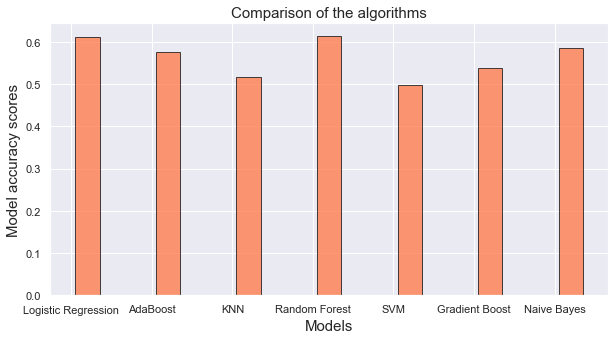

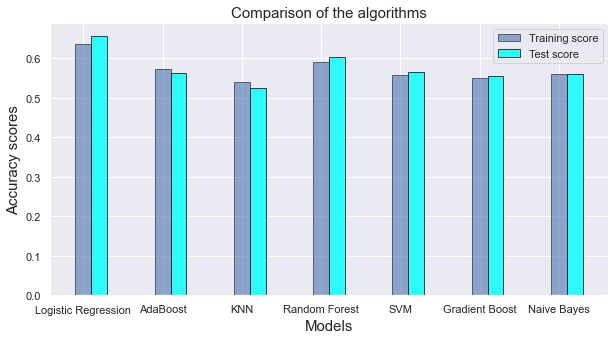

In [656]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6,7]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1,2,3,4,5,6,7], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing Accuracy train/test scores:

index=[1,2,3,4,5,6,7]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6,7], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

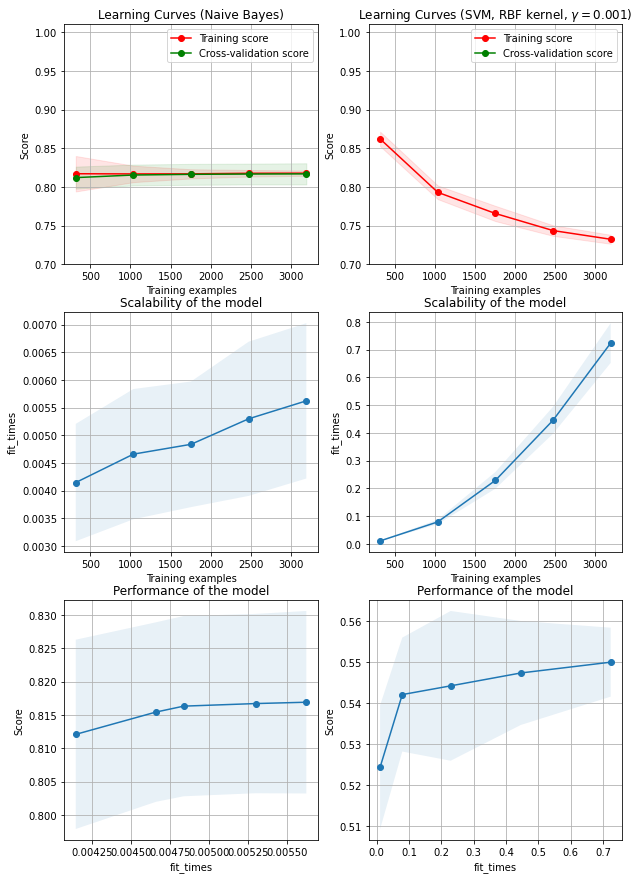

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, Y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, Y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))



title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Parameter Tuning for Random Forest

In [657]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100, 200, 400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(criterion='entropy',
            max_depth=2, max_features='auto',
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='accuracy').mean()
print(acc)
print(cv)

In [665]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
#len(importances)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Accuracy Scores

In [ ]:
from sklearn.metrics import accuracy_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
acc = accuracy_score(y_test, y_scores_rf)
print("Accuracy Score:", acc)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = accuracy_score(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('Accuracy (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

# Parameter Tuning for Logistic Regression

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [660]:
# Grid searching key hyperparametres for logistic regression

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
lr_param = {
        'solvers' : ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty' : ['12'],
        'c_values' : ['0.01', '1.00']
        }



In [661]:
lrGB = GridSearchCV(Logreg, param_grid = lr_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
lrGB.fit(X_train,y_train)
print("Best estimator", lrGB.best_estimator_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: 

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

LR = LogisticRegression(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
LR.fit(X_train, y_train)
y_predictions_LR = LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_predictions_LR)
cv_LR = cross_val_score(LR, X_test, y_test,scoring='accuracy').mean()
print(acc_GB)
print(cv_GB)

In [664]:
print(len(X.T))

17


In [ ]:
features = X
importances = list(LR.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Logistic Regression Classifier model',fontsize=15)
plt.savefig("29.png")
plt.show()
#len(importances)

# Accuracy score

In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

y_scores_lr = LR.predict_proba(X_test)
y_scores_lr = y_scores_lr[:,1]
acc_lr = accuracy_score(y_test, y_scores_lr)
print("Accuracy Score:", acc_lr)

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()

# Conclusion

In conclusion, the important features when deciding whether a team will cover a spread or not heavily depends on the initial line set by Las Vegas, which is consistent with every model we tested. This is an interesting conslusion because one would imagine a per-game stat would be more indicitive of performance, but maybe we need to separate the idea of winning from covering. While wins grab headlines, press, and hot takes buy talking heads, teams that cover don't. This suggests that when deciding which team to back, one should look past the headlines to understand which teams have traditionally covered more often -- the one LEAST talked about. Again, it's difficult to separate the idea of winning from covering, which is part of the reason sports books have continued to set record profits year-after-year.  

# Future Direction

Some ideas for the future is determining more specific features to feed our ML models. A way to do this is utilizing Feature Enginerring techniques to efficiently find some nuanced statistics that may help our model be more predictive. Other thoughts is finding other avenues for edges, like looking toward point totals.